**Coursebook: Reshaping and Visualization**
- Part 3 of Data Analytics Specialization
- Course Length: 12 hours
- Last Updated: February 2020
___

- Author: [Samuel Chan](https://github.com/onlyphantom)
- Developed by [Algoritma](https://algorit.ma)'s product division and instructors team

# Background

## Top-Down Approach 

The coursebook is part of the **Data Analytics Specialization** offered by [Algoritma](https://algorit.ma). It takes a more accessible approach compared to Algoritma's core educational products, by getting participants to overcome the "how" barrier first, rather than a detailed breakdown of the "why". 

This translates to an overall easier learning curve, one where the reader is prompted to write short snippets of code in frequent intervals, before being offered an explanation on the underlying theoretical frameworks. Instead of mastering the syntactic design of the Python programming language, then moving into data structures, and then the `pandas` library, and then the mathematical details in an imputation algorithm, and its code implementation; we would do the opposite: Implement the imputation, then a succinct explanation of why it works and applicational considerations (what to look out for, what are assumptions it made, when _not_ to use it etc).

## Training Objectives

This coursebook is intended for participants who have completed the preceding courses offered in the **Data Analytics Developer Specialization**. This is the third course, **Reshaping and Visualization**.

The coursebook focuses on:
- Stacking and Unstacking
- Working with MultiIndex DataFrames
- Reshaping your DataFrame with Melt
- Using Group By Effectively
- Visual Data Exploratory

At the end of this course is a Learn by Building section, where you are expected to apply all that you've learned on a new dataset, and attempt the given questions.

# Reproducible Environment

There are some new packages we'll use in this material. Usually, we can use `pip install`/`conda install` to install new libraries to our environment. But for now, let's try on another approach on preparing libraries needed for a certain project.

Imagine you're working with your team on a collaborative project. You initialize the project with certain dependencies and versions on your computer and all goes well. Later on, you need to 'ship' that project to your team which requires them to set up the same environment as yours. What would you do then to make sure that program will also runs smoothly on their machine? 

This is where you need to make your environment reproducible by creating a `requirements.txt` file.

If you browse on `/assets` directory on this repository, you'll find a file called `requirements.txt`. This file is used for specifying what python packages are required to run a certain project. If you open up the file, you will see something that looks similar to this:

backcall==0.1.0  
certifi==2019.11.28  
chardet==3.0.4  
cycler==0.10.0  
decorator==4.4.0  
idna==2.9  
ipython==7.7.0  
......


Notice we have a line for each package, then a version number. This is important because as you start developing your python applications, you will develop the application with specific versions of the packages in mind. In simple, `requirements.txt` helps to keep track of what version of each package you are using to prevent unexpected changes.

## Importing Requirements

We have discussed what the requirement files is for but how do we use it? Since we don't want to manually install and track every package needed for a certain project, let's try to import the requirements with the following steps:

**Step 1**: Prepare a "blank" new environment and activate it

```
conda env create -n <ENV_NAME> python=<PYTHON_VERSION>
conda activate <ENV_NAME>
```

**Step 2**: Navigate to the folder with your `requirements.txt`

```
cd <PATH_TO_REQUIREMENTS>
```

**Step 3**: Install the requirements

```
pip install -r requirements.txt
```

You have now successfuly installed all the requirements needed on this material! For your convenience, don't forget to link your new environment to jupyter-notebook using kernel:

```
pip install ipykernel
python -m ipykernel install --user --name=<ENV_NAME>
```

## Exporting Requirements

The `pip install` command always installs the latest published version of a package, but sometimes, you may want to install a specific version that you know works on your project.

Requirement files allow you to specify exactly which packages and versions should be installed. You can follow these steps to generate your requirement files:

**Step 1**: Activate desired environment

```
conda activate <ENV_NAME>
```

**Step 2**: Navigate to the folder where you want to save the `requirements.txt`
```
cd <PATH_TO_REQUIREMENTS>
```

**Step 3**: Freeze the environment

```
pip freeze > requirements.txt
```
The `freeze` command dumps all the packages and their versions to a standardized output. You can save it by any name you want but the convention is to name it as requirements.txt.

Now that you've discovered how to make your environment reproducible, we can back to our main focus of this week material; data reshaping and visualisation with pandas!

# Data Wrangling and Reshaping

In the previous two courses, we've got our hands on a few common techniques and learned how to explore data using `pandas` built-in methods. Specifically, we've  in the first and second part of this series how to use the following inspection, diagnostic and exploratory tools: 

**Data Inspection**
- `.head()` and `.tail()`
- `.describe()`
- `.shape` and `.size`
- `.axes`
- `.dtypes`
- Subsetting using `.loc`, `.iloc` and conditionals
---
**Diagnostic and Exploratory**
- Tables
- Cross-Tables and Aggregates
- Using `aggfunc` for aggregate functions
- Pivot Tables
- Working with DateTime
- Working with Categorical Data
- Duplicates and Missing Value Treatment

The first half of this course serves as an extension from the last. We'll pick up some new techniques to supplement our EDA toolset. Let us begin with reshaping techniques. 

In [5]:
from pandas_datareader import data
import pandas as pd

In [8]:
symbol = ['AAPL', 'FB', 'GOOGL']
source = 'yahoo'
start_date = '2018-01-01'
end_date = '2019-04-24'
stock = data.DataReader(symbol, source, start_date, end_date)
stock.head()

Attributes   Adj Close                                Close              \
Symbols           AAPL          FB        GOOGL        AAPL          FB   
Date                                                                      
2018-01-02  166.804016  181.419998  1073.209961  172.259995  181.419998   
2018-01-03  166.774963  184.669998  1091.520020  172.229996  184.669998   
2018-01-04  167.549622  184.330002  1095.760010  173.029999  184.330002   
2018-01-05  169.457214  186.850006  1110.290039  175.000000  186.850006   
2018-01-08  168.827820  188.279999  1114.209961  174.350006  188.279999   

Attributes                     High                                  Low  \
Symbols           GOOGL        AAPL          FB        GOOGL        AAPL   
Date                                                                       
2018-01-02  1073.209961  172.300003  181.580002  1075.979980  169.259995   
2018-01-03  1091.520020  174.550003  184.779999  1096.099976  171.960007   
2018-01-04  1095.760010  173.470001  186.210007  1104.079956  172.080002   
2018-01-05  1110.290039  175.369995  186.899994  1113.579956  173.050003   
2018-01-08  1114.209961  175.610001  188.899994  1119.160034  173.929993   

Attributes                                 Open                           \
Symbols             FB        GOOGL        AAPL          FB        GOOGL   
Date                                                                       
2018-01-02  177.550003  1053.020020  170.160004  177.679993  1053.020020   
2018-01-03  181.330002  1073.430054  172.529999  181.880005  1073.930054   
2018-01-04  184.100006  1094.260010  172.539993  184.899994  1097.089966   
2018-01-05  184.929993  1101.800049  173.440002  185.589996  1103.449951   
2018-01-08  186.330002  1110.000000  174.350006  187.199997  1111.000000   

Attributes      Volume                         
Symbols           AAPL          FB      GOOGL  
Date                                           
2018-01-02  25555900.0  18151900.0  1588300.0  
2018-01-03  29517900.0  16886600.0  1565900.0  
2018-01-04  22434600.0  13880900.0  1302600.0  
2018-01-05  23660000.0  13574500.0  1512500.0  
2018-01-08  20567800.0  17994700.0  1232200.0

If you do not have the `pandas_datareader` module installed, or if you're following along this coursebook without an active connection, you can instead load it from the serialized object I stored in your `data_cache` folder. 

Creating the DataFrame object by reading from `pickle`:
- `stock = pd.read_pickle('data_cache/stock')`

Serializing the DataFrame object to a byte stream using `pickle`:
- `stock.to_pickle('data_cache/stock')`

In [9]:
stock.to_pickle('data_cache/stock')
stock = pd.read_pickle('data_cache/stock')
stock.head()

Attributes   Adj Close                                Close              \
Symbols           AAPL          FB        GOOGL        AAPL          FB   
Date                                                                      
2018-01-02  166.804016  181.419998  1073.209961  172.259995  181.419998   
2018-01-03  166.774963  184.669998  1091.520020  172.229996  184.669998   
2018-01-04  167.549622  184.330002  1095.760010  173.029999  184.330002   
2018-01-05  169.457214  186.850006  1110.290039  175.000000  186.850006   
2018-01-08  168.827820  188.279999  1114.209961  174.350006  188.279999   

Attributes                     High                                  Low  \
Symbols           GOOGL        AAPL          FB        GOOGL        AAPL   
Date                                                                       
2018-01-02  1073.209961  172.300003  181.580002  1075.979980  169.259995   
2018-01-03  1091.520020  174.550003  184.779999  1096.099976  171.960007   
2018-01-04  1095.760010  173.470001  186.210007  1104.079956  172.080002   
2018-01-05  1110.290039  175.369995  186.899994  1113.579956  173.050003   
2018-01-08  1114.209961  175.610001  188.899994  1119.160034  173.929993   

Attributes                                 Open                           \
Symbols             FB        GOOGL        AAPL          FB        GOOGL   
Date                                                                       
2018-01-02  177.550003  1053.020020  170.160004  177.679993  1053.020020   
2018-01-03  181.330002  1073.430054  172.529999  181.880005  1073.930054   
2018-01-04  184.100006  1094.260010  172.539993  184.899994  1097.089966   
2018-01-05  184.929993  1101.800049  173.440002  185.589996  1103.449951   
2018-01-08  186.330002  1110.000000  174.350006  187.199997  1111.000000   

Attributes      Volume                         
Symbols           AAPL          FB      GOOGL  
Date                                           
2018-01-02  25555900.0  18151900.0  1588300.0  
2018-01-03  29517900.0  16886600.0  1565900.0  
2018-01-04  22434600.0  13880900.0  1302600.0  
2018-01-05  23660000.0  13574500.0  1512500.0  
2018-01-08  20567800.0  17994700.0  1232200.0

Notice how the data frame is a multi-index data frame. If you pay close attention, you can see a 2 levels of column axis: `Attributes` and `Symbols`. If you were to subset the data using square bracket, you will be accessing the highest level index:

In [25]:
stock['Close'].head()

Symbols,AAPL,FB,GOOGL
Date,,,
2018-01-02,172.259995,181.419998,1073.209961
2018-01-03,172.229996,184.669998,1091.520020
2018-01-04,173.029999,184.330002,1095.760010
2018-01-05,175.000000,186.850006,1110.290039
2018-01-08,174.350006,188.279999,1114.209961


Subsetting the `Close` column from the data frame will leave us with a single index column from the `Symbols` level.

**Dive Deeper:**

# Create a DataFrame by subsetting only the `Close` columns. Name it `closingprice`. Then, use `.isna().sum()` to count the number of missing values in each of the columns present in `closingprice`.

If there are any missing values, use the `.fillna(method='ffill')` method to fill those missing values:

In [29]:
## Your code below
closingprice = stock['Close']
closingprice.isna().sum()

## -- Solution code

Symbols
AAPL     0
FB       0
GOOGL    0
dtype: int64

In [30]:
## Your code below
closingprice.head(10)

## -- Solution code

Symbols,AAPL,FB,GOOGL
Date,,,
2018-01-02,172.259995,181.419998,1073.209961
2018-01-03,172.229996,184.669998,1091.520020
2018-01-04,173.029999,184.330002,1095.760010
2018-01-05,175.000000,186.850006,1110.290039
2018-01-08,174.350006,188.279999,1114.209961
2018-01-09,174.330002,187.869995,1112.790039
2018-01-10,174.289993,187.839996,1110.140015
2018-01-11,175.279999,187.770004,1112.050049
2018-01-12,177.089996,179.369995,1130.650024


If you pay close attention to the index of `stock`, you may already realized by now that there are days where no records were present. 2018-01-01, 2018-01-06, and 2018-01-07 were absent from our DataFrame because they happen to fall on weekends.

While the trading hours of [different stock markets differ](https://www.maybank-ke.com.sg/markets/markets-listing/trading-hours/) (the NYSE for example open its market floor from 9.30am to 4pm five days a week), on weekends as well as federal holidays all stock exchanges are closed for business.

We can create (or recreate) the index by passing in our own values. In the following cell we created a date range and create the index using that new date range:

In [33]:
closingprice = stock['Close']
quarter1 = pd.date_range(start="2019-01-01", end="2019-03-31")
closingprice = closingprice.reindex(quarter1)
closingprice.head(8)

Symbols,AAPL,FB,GOOGL
2019-01-01,NaN,NaN,NaN
2019-01-02,157.919998,135.679993,1054.680054
2019-01-03,142.190002,131.740005,1025.469971
2019-01-04,148.259995,137.949997,1078.069946
2019-01-05,NaN,NaN,NaN
2019-01-06,NaN,NaN,NaN
2019-01-07,147.929993,138.050003,1075.920044
2019-01-08,150.750000,142.529999,1085.369995


Now use forward-fill to fill the `NA` values:

In [39]:
## Your code below
closingprice.isna().sum()
## -- Solution code

Symbols
AAPL     29
FB       29
GOOGL    29
dtype: int64

In [38]:
## Your code below
closingprice.ffill().bfill()
## -- Solution code

Symbols,AAPL,FB,GOOGL
2019-01-01,157.919998,135.679993,1054.680054
2019-01-02,157.919998,135.679993,1054.680054
2019-01-03,142.190002,131.740005,1025.469971
2019-01-04,148.259995,137.949997,1078.069946
2019-01-05,148.259995,137.949997,1078.069946
...,...,...,...
2019-03-27,188.470001,165.869995,1178.010010
2019-03-28,188.720001,165.550003,1172.270020
2019-03-29,189.949997,166.690002,1176.890015
2019-03-30,189.949997,166.690002,1176.890015


## `stack()` and `unstack()`

`stack()` stack the prescribed level(s) from columns to index and is particularly useful on DataFrames having a multi-level columns. It does so by "shifting" the columns to create new levels on its index. 

This is easier understood when we just see an example. Notice that `stock` has a 2-level column (Attributes and Symbols) and 1-level index (Date):

In [41]:
stock.head(8)

Attributes   Adj Close                                Close              \
Symbols           AAPL          FB        GOOGL        AAPL          FB   
Date                                                                      
2018-01-02  166.804016  181.419998  1073.209961  172.259995  181.419998   
2018-01-03  166.774963  184.669998  1091.520020  172.229996  184.669998   
2018-01-04  167.549622  184.330002  1095.760010  173.029999  184.330002   
2018-01-05  169.457214  186.850006  1110.290039  175.000000  186.850006   
2018-01-08  168.827820  188.279999  1114.209961  174.350006  188.279999   
2018-01-09  168.808456  187.869995  1112.790039  174.330002  187.869995   
2018-01-10  168.769714  187.839996  1110.140015  174.289993  187.839996   
2018-01-11  169.728378  187.770004  1112.050049  175.279999  187.770004   

Attributes                     High                                  Low  \
Symbols           GOOGL        AAPL          FB        GOOGL        AAPL   
Date                                                                       
2018-01-02  1073.209961  172.300003  181.580002  1075.979980  169.259995   
2018-01-03  1091.520020  174.550003  184.779999  1096.099976  171.960007   
2018-01-04  1095.760010  173.470001  186.210007  1104.079956  172.080002   
2018-01-05  1110.290039  175.369995  186.899994  1113.579956  173.050003   
2018-01-08  1114.209961  175.610001  188.899994  1119.160034  173.929993   
2018-01-09  1112.790039  175.059998  188.800003  1118.439941  173.410004   
2018-01-10  1110.140015  174.300003  187.889999  1112.780029  173.000000   
2018-01-11  1112.050049  175.490005  188.399994  1114.849976  174.490005   

Attributes                                 Open                           \
Symbols             FB        GOOGL        AAPL          FB        GOOGL   
Date                                                                       
2018-01-02  177.550003  1053.020020  170.160004  177.679993  1053.020020   
2018-01-03  181.330002  1073.430054  172.529999  181.880005  1073.930054   
2018-01-04  184.100006  1094.260010  172.539993  184.899994  1097.089966   
2018-01-05  184.929993  1101.800049  173.440002  185.589996  1103.449951   
2018-01-08  186.330002  1110.000000  174.350006  187.199997  1111.000000   
2018-01-09  187.100006  1108.199951  174.550003  188.699997  1118.439941   
2018-01-10  185.630005  1103.979980  173.160004  186.940002  1107.000000   
2018-01-11  187.380005  1106.479980  174.589996  188.399994  1112.310059   

Attributes      Volume                         
Symbols           AAPL          FB      GOOGL  
Date                                           
2018-01-02  25555900.0  18151900.0  1588300.0  
2018-01-03  29517900.0  16886600.0  1565900.0  
2018-01-04  22434600.0  13880900.0  1302600.0  
2018-01-05  23660000.0  13574500.0  1512500.0  
2018-01-08  20567800.0  17994700.0  1232200.0  
2018-01-09  21584000.0  12393100.0  1340400.0  
2018-01-10  23959900.0  10529900.0  1036700.0  
2018-01-11  18667700.0   9588600.0  1121200.0

When we stack the `stock` DataFrame, we shrink the number of levels on its column by one: `stock` now has 1-level column named `Attributes`: 

In [42]:
#stack = Baris menjadi Kolom
stock.stack().head(8)

Attributes            Adj Close        Close         High          Low  \
Date       Symbols                                                       
2018-01-02 AAPL      166.804016   172.259995   172.300003   169.259995   
           FB        181.419998   181.419998   181.580002   177.550003   
           GOOGL    1073.209961  1073.209961  1075.979980  1053.020020   
2018-01-03 AAPL      166.774963   172.229996   174.550003   171.960007   
           FB        184.669998   184.669998   184.779999   181.330002   
           GOOGL    1091.520020  1091.520020  1096.099976  1073.430054   
2018-01-04 AAPL      167.549622   173.029999   173.470001   172.080002   
           FB        184.330002   184.330002   186.210007   184.100006   

Attributes                 Open      Volume  
Date       Symbols                           
2018-01-02 AAPL      170.160004  25555900.0  
           FB        177.679993  18151900.0  
           GOOGL    1053.020020   1588300.0  
2018-01-03 AAPL      172.529999  29517900.0  
           FB        181.880005  16886600.0  
           GOOGL    1073.930054   1565900.0  
2018-01-04 AAPL      172.539993  22434600.0  
           FB        184.899994  13880900.0

In [54]:
stock.stack(level=0)

Symbols                        AAPL            FB         GOOGL
Date       Attributes                                          
2018-01-02 Adj Close   1.668040e+02  1.814200e+02  1.073210e+03
           Close       1.722600e+02  1.814200e+02  1.073210e+03
           High        1.723000e+02  1.815800e+02  1.075980e+03
           Low         1.692600e+02  1.775500e+02  1.053020e+03
           Open        1.701600e+02  1.776800e+02  1.053020e+03
...                             ...           ...           ...
2019-04-24 Close       2.071600e+02  1.825800e+02  1.260050e+03
           High        2.084800e+02  1.851400e+02  1.274000e+03
           Low         2.070500e+02  1.816500e+02  1.259810e+03
           Open        2.073600e+02  1.844900e+02  1.270590e+03
           Volume      1.754060e+07  3.728990e+07  1.169800e+06

[1974 rows x 3 columns]

In [56]:
#unstack = Kolom menjadi baris
stock.stack().unstack(level=0)

Attributes    Adj Close                                                      \
Date         2018-01-02   2018-01-03   2018-01-04   2018-01-05   2018-01-08   
Symbols                                                                       
AAPL         166.804016   166.774963   167.549622   169.457214   168.827820   
FB           181.419998   184.669998   184.330002   186.850006   188.279999   
GOOGL       1073.209961  1091.520020  1095.760010  1110.290039  1114.209961   

Attributes                                                                   \
Date         2018-01-09   2018-01-10   2018-01-11   2018-01-12   2018-01-16   
Symbols                                                                       
AAPL         168.808456   168.769714   169.728378   171.481064   170.609558   
FB           187.869995   187.839996   187.770004   179.369995   178.389999   
GOOGL       1112.790039  1110.140015  1112.050049  1130.650024  1130.699951   

Attributes  ...      Volume                                                  \
Date        ...  2019-04-10  2019-04-11  2019-04-12  2019-04-15  2019-04-16   
Symbols     ...                                                               
AAPL        ...  21695300.0  20900800.0  27760700.0  17536600.0  25696400.0   
FB          ...  11701500.0   8071000.0  12329800.0  10834800.0  11215200.0   
GOOGL       ...    775500.0    849900.0   1215600.0   1189800.0   1131100.0   

Attributes                                                              
Date        2019-04-17  2019-04-18  2019-04-22  2019-04-23  2019-04-24  
Symbols                                                                 
AAPL        28906800.0  24195800.0  19439500.0  23323000.0  17540600.0  
FB           9973700.0  11655600.0  13389900.0  19954800.0  37289900.0  
GOOGL        1518300.0   1237500.0    954200.0   1593400.0   1169800.0  

[3 rows x 1974 columns]

In [57]:
#unstack = Kolom menjadi baris
stock.unstack(level=0)

Attributes  Symbols  Date      
Adj Close   AAPL     2018-01-02    1.668040e+02
                     2018-01-03    1.667750e+02
                     2018-01-04    1.675496e+02
                     2018-01-05    1.694572e+02
                     2018-01-08    1.688278e+02
                                       ...     
Volume      GOOGL    2019-04-17    1.518300e+06
                     2019-04-18    1.237500e+06
                     2019-04-22    9.542000e+05
                     2019-04-23    1.593400e+06
                     2019-04-24    1.169800e+06
Length: 5922, dtype: float64

`unstack()` does the opposite: it "shifts" the levels from index axis onto column axis. Try and create a stack DataFrame, and then apply `unstack` on the new DataFrame to see it return to the original shape:

In [64]:
## Your code below
stock.head()

## -- Solution code

Attributes   Adj Close                                Close              \
Symbols           AAPL          FB        GOOGL        AAPL          FB   
Date                                                                      
2018-01-02  166.804016  181.419998  1073.209961  172.259995  181.419998   
2018-01-03  166.774963  184.669998  1091.520020  172.229996  184.669998   
2018-01-04  167.549622  184.330002  1095.760010  173.029999  184.330002   
2018-01-05  169.457214  186.850006  1110.290039  175.000000  186.850006   
2018-01-08  168.827820  188.279999  1114.209961  174.350006  188.279999   

Attributes                     High                                  Low  \
Symbols           GOOGL        AAPL          FB        GOOGL        AAPL   
Date                                                                       
2018-01-02  1073.209961  172.300003  181.580002  1075.979980  169.259995   
2018-01-03  1091.520020  174.550003  184.779999  1096.099976  171.960007   
2018-01-04  1095.760010  173.470001  186.210007  1104.079956  172.080002   
2018-01-05  1110.290039  175.369995  186.899994  1113.579956  173.050003   
2018-01-08  1114.209961  175.610001  188.899994  1119.160034  173.929993   

Attributes                                 Open                           \
Symbols             FB        GOOGL        AAPL          FB        GOOGL   
Date                                                                       
2018-01-02  177.550003  1053.020020  170.160004  177.679993  1053.020020   
2018-01-03  181.330002  1073.430054  172.529999  181.880005  1073.930054   
2018-01-04  184.100006  1094.260010  172.539993  184.899994  1097.089966   
2018-01-05  184.929993  1101.800049  173.440002  185.589996  1103.449951   
2018-01-08  186.330002  1110.000000  174.350006  187.199997  1111.000000   

Attributes      Volume                         
Symbols           AAPL          FB      GOOGL  
Date                                           
2018-01-02  25555900.0  18151900.0  1588300.0  
2018-01-03  29517900.0  16886600.0  1565900.0  
2018-01-04  22434600.0  13880900.0  1302600.0  
2018-01-05  23660000.0  13574500.0  1512500.0  
2018-01-08  20567800.0  17994700.0  1232200.0

In [89]:
## Your code below
stock2 = stock.stack(level=0).unstack(level=1)
stock2
## -- Solution code

Symbols           AAPL                                                  \
Attributes   Adj Close       Close        High         Low        Open   
Date                                                                     
2018-01-02  166.804016  172.259995  172.300003  169.259995  170.160004   
2018-01-03  166.774963  172.229996  174.550003  171.960007  172.529999   
2018-01-04  167.549622  173.029999  173.470001  172.080002  172.539993   
2018-01-05  169.457214  175.000000  175.369995  173.050003  173.440002   
2018-01-08  168.827820  174.350006  175.610001  173.929993  174.350006   
...                ...         ...         ...         ...         ...   
2019-04-17  200.505585  203.130005  203.380005  198.610001  199.539993   
2019-04-18  201.226151  203.860001  204.149994  202.520004  203.119995   
2019-04-22  201.887497  204.529999  204.940002  202.339996  202.830002   
2019-04-23  204.799362  207.479996  207.750000  203.899994  204.429993   
2019-04-24  204.483505  207.160004  208.479996  207.050003  207.360001   

Symbols                         FB                                      \
Attributes      Volume   Adj Close       Close        High         Low   
Date                                                                     
2018-01-02  25555900.0  181.419998  181.419998  181.580002  177.550003   
2018-01-03  29517900.0  184.669998  184.669998  184.779999  181.330002   
2018-01-04  22434600.0  184.330002  184.330002  186.210007  184.100006   
2018-01-05  23660000.0  186.850006  186.850006  186.899994  184.929993   
2018-01-08  20567800.0  188.279999  188.279999  188.899994  186.330002   
...                ...         ...         ...         ...         ...   
2019-04-17  28906800.0  178.779999  178.779999  180.740005  178.360001   
2019-04-18  24195800.0  178.279999  178.279999  178.880005  177.339996   
2019-04-22  19439500.0  181.440002  181.440002  181.669998  178.250000   
2019-04-23  23323000.0  183.779999  183.779999  184.220001  181.479996   
2019-04-24  17540600.0  182.580002  182.580002  185.139999  181.649994   

Symbols                                   GOOGL                            \
Attributes        Open      Volume    Adj Close        Close         High   
Date                                                                        
2018-01-02  177.679993  18151900.0  1073.209961  1073.209961  1075.979980   
2018-01-03  181.880005  16886600.0  1091.520020  1091.520020  1096.099976   
2018-01-04  184.899994  13880900.0  1095.760010  1095.760010  1104.079956   
2018-01-05  185.589996  13574500.0  1110.290039  1110.290039  1113.579956   
2018-01-08  187.199997  17994700.0  1114.209961  1114.209961  1119.160034   
...                ...         ...          ...          ...          ...   
2019-04-17  179.600006   9973700.0  1240.140015  1240.140015  1245.099976   
2019-04-18  178.800003  11655600.0  1241.469971  1241.469971  1245.939941   
2019-04-22  178.250000  13389900.0  1253.760010  1253.760010  1254.339966   
2019-04-23  182.740005  19954800.0  1270.589966  1270.589966  1274.430054   
2019-04-24  184.490005  37289900.0  1260.050049  1260.050049  1274.000000   

Symbols                                          
Attributes          Low         Open     Volume  
Date                                             
2018-01-02  1053.020020  1053.020020  1588300.0  
2018-01-03  1073.430054  1073.930054  1565900.0  
2018-01-04  1094.260010  1097.089966  1302600.0  
2018-01-05  1101.800049  1103.449951  1512500.0  
2018-01-08  1110.000000  1111.000000  1232200.0  
...                 ...          ...        ...  
2019-04-17  1232.900024  1237.000000  1518300.0  
2019-04-18  1239.410034  1245.000000  1237500.0  
2019-04-22  1233.369995  1236.670044   954200.0  
2019-04-23  1251.969971  1256.640015  1593400.0  
2019-04-24  1259.810059  1270.589966  1169800.0  

[329 rows x 18 columns]

In [85]:
## Your code below
# AAPL
(stock2.iloc[-1,3] - stock2.iloc[0,4]) / stock2.iloc[0,4]

#FB
(stock2.iloc[-1,7] - stock2.iloc[0,10]) / stock2.iloc[0,10]

#GOOGL
(stock2.iloc[-1,-5] - stock2.iloc[0,-2]) / stock2.iloc[0,-2]

## -- Solution code

18.391370825823092

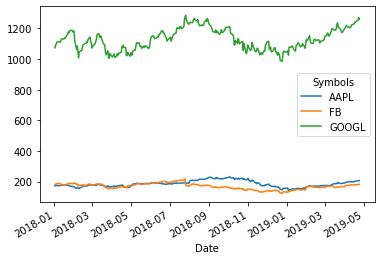

In [92]:
## Your code below
stock['Close'].plot()
## -- Solution code

**Knowledge Check:** Stack and Unstack

Which of the following statement is correct?

- [ ] `stack()` changes the DataFrame from wide to long
- [ ] `unstack()` changes the DataFrame from long to wide
- [ ] `unstack()` changes the DataFrame from wide to long

## Melt

Speaking of reshaping a DataFrame from wide format to long, another method that should be in your toolset is `melt()`. Consider the following DataFrame, which is created from `pandas` MultiIndex Slicers method, `.xs()`:

In [5]:
aapl = stock.xs('AAPL', level='Symbols', axis=1)
aapl.head()

Attributes,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2018-01-02,167.199890,172.259995,172.300003,169.259995,170.160004,25555900.0
2018-01-03,167.170776,172.229996,174.550003,171.960007,172.529999,29517900.0
2018-01-04,167.947266,173.029999,173.470001,172.080002,172.539993,22434600.0
2018-01-05,169.859406,175.000000,175.369995,173.050003,173.440002,23660000.0
2018-01-08,169.228500,174.350006,175.610001,173.929993,174.350006,20567800.0


In [51]:
aapl.shape

(329, 6)

The DataFrame above is wide: it has 329 rows and 6 columns. The `melt()` function gathers all the columns into one and store the value corresponding to each column such that the resulting DataFrame has 329 * 6 = 1,974 rows, along with the identifier and values columns:

In [6]:
aapl_melted = aapl.melt()
aapl_melted.head()

,Attributes,value
0,Adj Close,167.199890
1,Adj Close,167.170776
2,Adj Close,167.947266
3,Adj Close,169.859406
4,Adj Close,169.228500


In [7]:
aapl_melted.shape

(1974, 2)

We can optionally specify one or more columns to be identifier variables (`id_vars`), which treat all other columns as value variables (`value_vars`):

In [8]:
aapl.reset_index().melt(id_vars='Date')[325:333]

,Date,Attributes,value
325,2019-04-18,Adj Close,201.703720
326,2019-04-22,Adj Close,202.366638
327,2019-04-23,Adj Close,205.285416
328,2019-04-24,Adj Close,204.968811
329,2018-01-02,Close,172.259995
330,2018-01-03,Close,172.229996
331,2018-01-04,Close,173.029999
332,2018-01-05,Close,175.000000


**Knowledge Check:** Missing Values

Add a cell below, and fill the missing values in `aapl` using any method deemed appropriate:

In [9]:
march = pd.date_range(start="2018-03-01", end="2019-03-31")
aapl = stock.xs('AAPL', level='Symbols', axis=1)
aapl = aapl.reindex(march)
aapl.head(10)

Attributes,Adj Close,Close,High,Low,Open,Volume
2018-03-01,170.551941,175.000000,179.779999,172.660004,178.539993,48802000.0
2018-03-02,171.731186,176.210007,176.300003,172.449997,172.800003,38454000.0
2018-03-03,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-04,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-05,172.325714,176.820007,177.740005,174.520004,175.210007,28401400.0
2018-03-06,172.179504,176.669998,178.250000,176.130005,177.910004,23788500.0
2018-03-07,170.581207,175.029999,175.850006,174.270004,174.940002,31703500.0
2018-03-08,172.442642,176.940002,177.119995,175.070007,175.479996,23774100.0
2018-03-09,175.405365,179.979996,180.000000,177.389999,177.960007,32185200.0
2018-03-10,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
## Your code below


## -- Solution code

# Pandas and Matplotlib

Surely this is the point where a data analyst whip up some flashy charts using the popular `matplotlib` library? 

Well - yes. Even better, we're going to use the `DataFrame.plot()` method, built-into `pandas` which in turn calls `matplotlib` plotting functions under-the-hood. Notice that we added `matplotlib.pyplot` as an import, even though our code will not explicitly call `matplotlib` but rely on `pandas` implementation.

Now let's take a look at apple stock data frame:

In [14]:
aapl.head()

Attributes,Adj Close,Close,High,Low,Open,Volume
2018-03-01,170.551941,175.000000,179.779999,172.660004,178.539993,48802000.0
2018-03-02,171.731186,176.210007,176.300003,172.449997,172.800003,38454000.0
2018-03-03,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-04,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-05,172.325714,176.820007,177.740005,174.520004,175.210007,28401400.0


The best way to demonstrate the efficiency gains of `DataFrame.plot()` is to see it in action. We will call `.plot()` directly on our `DataFrame` - `pandas` take care of the  matplotlib code that, [by matplotlib's own admission](https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py), _can be daunting to many new users_.

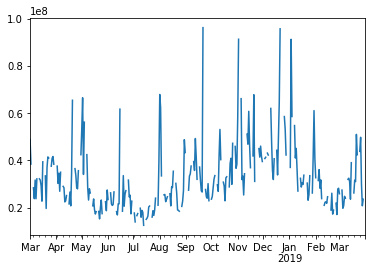

In [16]:
aapl['Volume'].plot()

We can [customize our plots with style sheets](https://matplotlib.org/users/style_sheets.html) but a handy reference is within reach. You can substitute 'default' for any one of the styles available and re-run the plotting code to see the styles being applied.

In [4]:
print(plt.style.available)
plt.style.use('default')

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


Because the `.plot()` method is called on a DataFrame object, we can have an indexed DataFrame with multiple columns and `plot` will handle these using its default options:

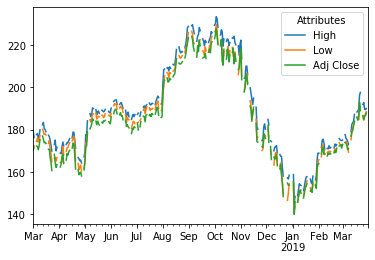

In [17]:
aapl.loc[:, ['High', 'Low', 'Adj Close']].plot()

# Group By

Reshaping data is an important component of any data wrangling toolkit as it allows the analyst to "massage" the data into the desired shape for further processing. 

Another equally important technique is the group by operation. Analysts having some experience with SQL or other data analysis toolsets (R's `tidyverse` for example) will find the group by operation a familiar strategy in many analysis-heavy workflow.

Consider the following DataFrame:

In [54]:
volume = stock.xs('Volume', level='Attributes', axis=1)
volume = volume.round(2)
volume.head()

Symbols,AAPL,FB,GOOGL
Date,,,
2018-01-02,25555900.0,18151900.0,1588300.0
2018-01-03,29517900.0,16886600.0,1565900.0
2018-01-04,22434600.0,13880900.0,1302600.0
2018-01-05,23660000.0,13574500.0,1512500.0
2018-01-08,20567800.0,17994700.0,1232200.0


Notice how the data frame shows amount of daily volume transaction, say we would like to compare the average daily transaction for AAPL, FB, and GOOGL. Let's perform a melting function:

In [56]:
volume_melted = volume.melt()
volume_melted.head()

,Symbols,value
0,AAPL,25555900.0
1,AAPL,29517900.0
2,AAPL,22434600.0
3,AAPL,23660000.0
4,AAPL,20567800.0


Supposed we would like to compare the average volume transaction between each stock price. On average, which of the 3 stocks has the highest average daily transaction volume?

In [58]:
volume_melted.groupby('Symbols').mean()

,value
Symbols,
AAPL,3.310283e+07
FB,2.560214e+07
GOOGL,1.925102e+06


## Visualizing Barchart for Comparison

Let's try and experiment with pandas' `plot` parameter from the **Parameters** list:

- **kind** : _str_
    - 'bar': bar chart
    
Say we would like to compare the average daily volume sold from the companies. To do that, we will need to extract volume attribute from our dataframe, and perform a melt function:

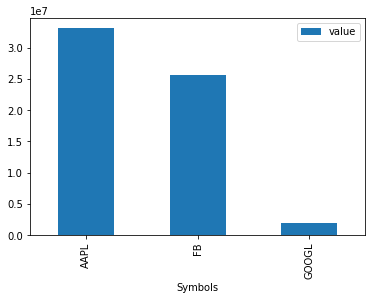

In [60]:
volume_melted.groupby('Symbols').mean().plot(kind='bar')

If we were to compare the visualization to the numerical figure, it is far way easier to compare each stock's average volume. Now let's consider this following data frame:

In [61]:
aapl = stock.xs('AAPL', level='Symbols', axis=1)
aapl = aapl.round(2)
aapl['Close_Diff'] = aapl['Close'].diff()
aapl['Weekday'] = aapl.index.weekday_name
aapl['Month'] = aapl.index.month_name()
aapl.tail()

Attributes,Adj Close,Close,High,Low,Open,Volume,Close_Diff,Weekday,Month
Date,,,,,,,,,
2019-04-17,200.98,203.13,203.38,198.61,199.54,28906800.0,3.88,Wednesday,April
2019-04-18,201.70,203.86,204.15,202.52,203.12,24195800.0,0.73,Thursday,April
2019-04-22,202.37,204.53,204.94,202.34,202.83,19439500.0,0.67,Monday,April
2019-04-23,205.29,207.48,207.75,203.90,204.43,23323000.0,2.95,Tuesday,April
2019-04-24,204.97,207.16,208.48,207.05,207.36,17540600.0,-0.32,Wednesday,April


Pay special attention to how the Close_Diff column was created. It's the difference between the Close value of a stock price on a given day and the following day.

Supposed we want to compare the Close_Diff between each Weekday; On average, does Tuesday record a higher difference between the Close price of Apple stock compared to a Thursday?

In [63]:
aapl.groupby('Weekday').mean()

Attributes,Adj Close,Close,High,Low,Open,Volume,Close_Diff
Weekday,,,,,,,
Friday,181.872121,185.425455,187.314848,183.676970,185.743636,3.663884e+07,-0.464848
Monday,182.221613,185.754516,187.599516,183.823065,185.788226,3.276606e+07,0.000484
Thursday,182.415224,186.024179,187.768806,184.261940,185.905075,3.297499e+07,0.084776
Tuesday,182.927164,186.539254,188.197910,184.630896,186.133284,3.084036e+07,0.313485
Wednesday,182.697463,186.287612,188.078358,184.316418,186.125224,3.232156e+07,0.584776


Now to create the same bar chart using `plot` function:

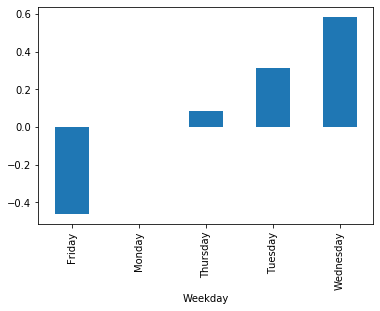

In [160]:
aapl.groupby('Weekday').mean()['Close_Diff'].plot(kind='bar')

We can also improve our visualization efficiency by average transaction volume values in advance, so then the bars from our plot will be arranged based on the value, rather than the weekday's alphabetical order.

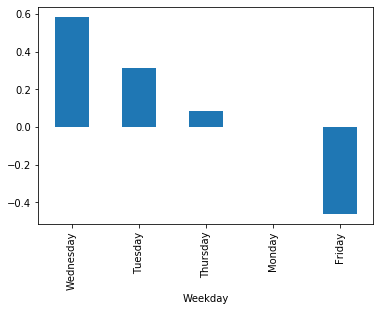

In [161]:
aapl.groupby('Weekday').mean()['Close_Diff'].\
sort_values(ascending=False).\
plot(kind='bar')

We can also created a manually ordered index by specifying the order of the day.

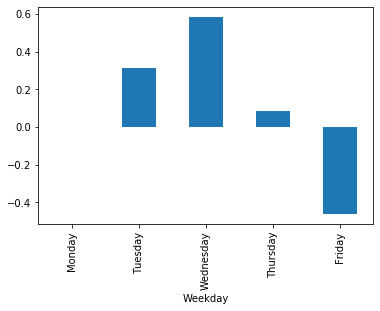

In [162]:
wday = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday"]

aapl_wday = aapl.groupby('Weekday').mean()['Close_Diff']
aapl_wday.index = pd.CategoricalIndex(aapl_wday.index,\
                                      categories=wday,\
                                      ordered=True)

aapl_wday.sort_index().plot(kind='bar')

## Using Grouped Barchart

If you pay close attention to the index of `stock`, you may already realized by now that there are days where no records were present. 2018-01-01, 2018-01-06, and 2018-01-07 were absent from our DataFrame because they happen to fall on weekends.

While the trading hours of [different stock markets differ](https://www.maybank-ke.com.sg/markets/markets-listing/trading-hours/) (the NYSE for example open its market floor from 9.30am to 4pm five days a week), on weekends as well as federal holidays all stock exchanges are closed for business.

We can create (or recreate) the index by passing in our own values. In the following cell we created a date range and create the index using that new date range:

In [4]:
closingprice = stock['Close']
quarter1 = pd.date_range(start="2019-01-01", end="2019-03-31")
closingprice = closingprice.reindex(quarter1)
closingprice.head(8)

Symbols,AAPL,FB,GOOGL
2019-01-01,NaN,NaN,NaN
2019-01-02,157.919998,135.679993,1054.680054
2019-01-03,142.190002,131.740005,1025.469971
2019-01-04,148.259995,137.949997,1078.069946
2019-01-05,NaN,NaN,NaN
2019-01-06,NaN,NaN,NaN
2019-01-07,147.929993,138.050003,1075.920044
2019-01-08,150.750000,142.529999,1085.369995


Then, use `.isna().sum()` to count the number of missing values in each of the columns present in `closingprice`.

If there are any missing values, use the `.fillna(method='ffill')` method to fill those missing values:

In [176]:
closingprice.isna().sum()

Symbols
AAPL     29
FB       29
GOOGL    29
Month     0
dtype: int64

In [177]:
## Your code below



## -- Solution code

Once we are done fill in the missing values we can try to visualize using a grouped barchart to compare each month's closing price for the first quarter of 2019 and compare it for the 3 stocks.

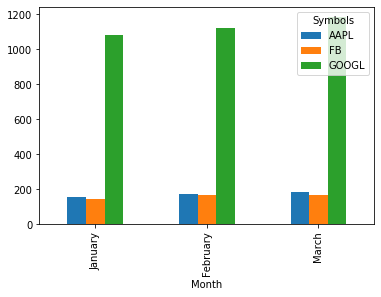

In [190]:
months = ["January", "February", "March"]

average_closing = closingprice.groupby('Month').mean()
average_closing.index = pd.CategoricalIndex(average_closing.index,\
                                            categories=months,\
                                            ordered=True)

average_closing.sort_index().plot(kind='bar')

A full reference to [the official documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) on this method would be outside the scope of this coursebook, but is worth a read. 

## Combining `agg` and `groupby`

So far, we have explored several pandas aggregational toolkit, such as:
- `pd.crosstab()`
- `pd.pivot_table()`

In this chapter, we'll explore another pandas' aggregating tools:
- `groupby` aggregation.

**Disucission:**

(`pivot_table` & `pd.crosstab` equivalency)

The `pivot_table` method and the `crosstab` function can both produce the exact same results with the same shape. They both share the parameters; `index`, `columns`, `values`, and `aggfunc`. 

The major difference on the surface is that `crosstab` is a function and not a DataFrame method. This forces you to use columns as Series and not string names for the parameters.

1. Suppose you want to compare the number of total transactions over Weekdays of each quarter period. Create a `pivot_table` that solve the problem!


2. Try to reproduce the same result by using `crosstab`


3. What if, instead of compare the total transactions, you want to compare the total revenue from the same period? Use both `pivot_table` and `crosstab` as the solution. Discuss with your friend, which method is more relevant in this case?

Pay attention to the following group by operation:

In [29]:
stock.stack().reset_index().groupby('Symbols').agg({
    'Close': 'mean',
    'High': 'max',
    'Low': 'min'
})

,Close,High,Low
Symbols,,,
AAPL,184.160004,233.470001,142.000000
FB,171.160004,218.619995,123.019997
GOOGL,1120.540039,1291.439941,977.659973


Say we would like to know a glimpse of the maximum stock price, minimum stock price, and the average of closing price from the 3 companies. To do that, we'll need to combine `groupby` with `agg` and map each column with its designated of the aggregation function.

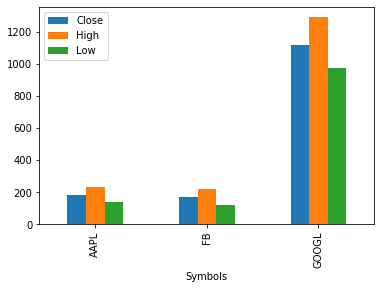

In [30]:
stock.stack().reset_index().groupby('Symbols').agg({
    'Close': 'median',
    'High': 'max',
    'Low': 'min'
}).plot(kind='bar')

**Knowledge Check:** Using `plot`

Consider the following data frame:

In [69]:
import datetime

stock['YearMonth'] = pd.to_datetime(stock.index.date).to_period('M')
monthly_closing = stock.groupby('YearMonth').mean().loc[:,['Close','Low', 'High']]
monthly_closing.head()

Attributes       Close                                 High              \
Symbols           AAPL          FB        GOOGL        AAPL          FB   
YearMonth                                                                 
2018-01     174.005237  184.962856  1139.394293  175.203334  186.210951   
2018-02     167.638947  180.269473  1091.880002  169.887893  183.131581   
2018-03     174.496192  173.489522  1093.769060  176.799524  176.145239   
2018-04     169.834287  163.810476  1039.951910  171.657618  166.086190   
2018-05     185.536818  182.930000  1074.852717  186.469091  183.873182   

Attributes                      Low                           
Symbols           GOOGL        AAPL          FB        GOOGL  
YearMonth                                                     
2018-01     1144.575713  172.818096  182.924763  1129.204764  
2018-02     1107.948416  165.479475  177.756316  1078.148428  
2018-03     1110.952869  173.061430  170.508097  1078.952858  
2018-04     1054.315232  168.292382  161.546191  1028.276672  
2018-05     1082.155906  183.862273  180.949998  1063.676824

Which of the following will be appropriate plot to use?

- [ ] Line plot
- [ ] Scatter plot
- [ ] Bar plot
- [ ] Box plot

In [70]:
## Your code below


## -- Solution code